In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Sales Data.csv')


In [3]:
# Display basic information and the first few rows of the dataset
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB
None
   Unnamed: 0  Order ID               Product  Quantity Ordered  Price Each  \
0           0    295665    Macbook Pro Laptop                 1     1700.00   
1           1    295666    LG Washing M

In [4]:
# Data Manipulation

# Convert 'Order Date' column to datetime format
data['Order Date'] = pd.to_datetime(data['Order Date'])

In [5]:
# Extract Month and Hour from 'Order Date'
data['Month'] = data['Order Date'].dt.month
data['Hour'] = data['Order Date'].dt.hour


In [6]:
# Calculate Sales (Quantity * Price Each)
data['Sales'] = data['Quantity Ordered'] * data['Price Each']

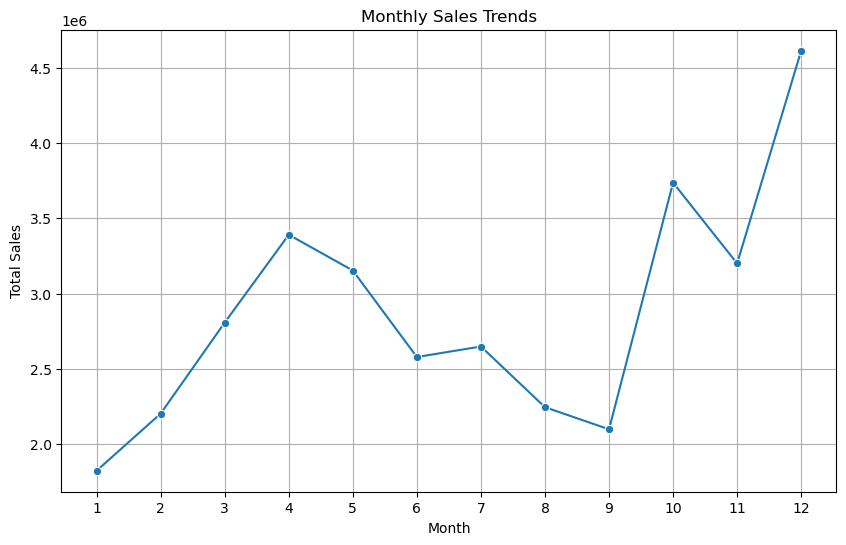

In [7]:
# Data Visualization

# Plot sales trends over time (Monthly)
plt.figure(figsize=(10, 6))
monthly_sales = data.groupby('Month')['Sales'].sum()
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13))
plt.grid()
plt.show()

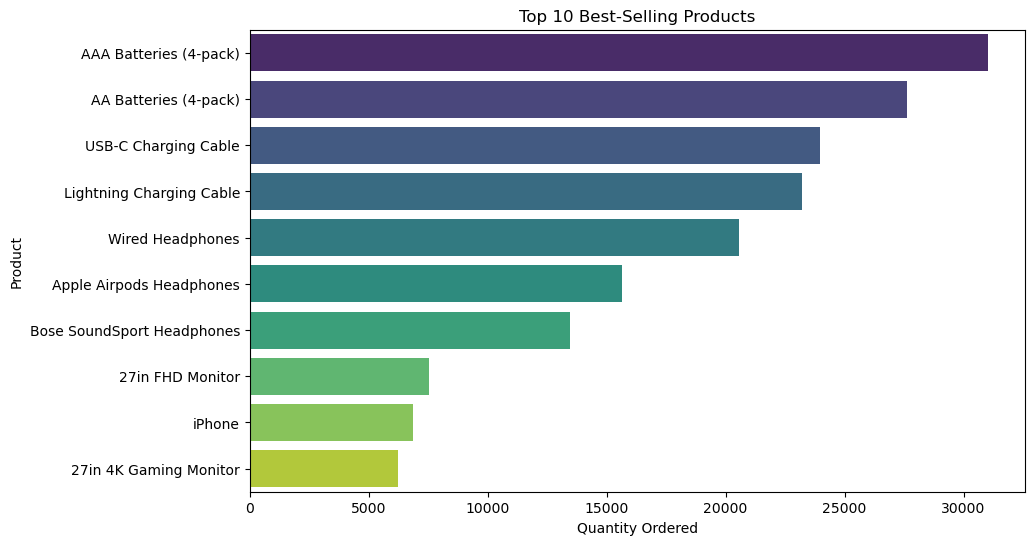

In [8]:
# Plot top-selling products
plt.figure(figsize=(10, 6))
top_products = data.groupby('Product')['Quantity Ordered'].sum().sort_values(ascending=False).head(10)
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Ordered')
plt.ylabel('Product')
plt.show()


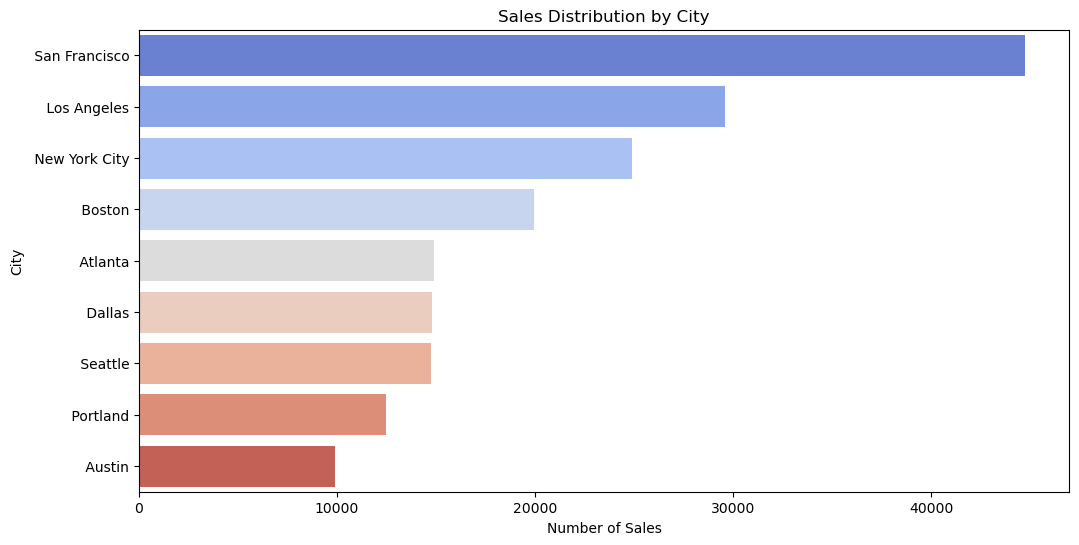

In [9]:
# Visualize sales distribution by city
plt.figure(figsize=(12, 6))
sns.countplot(y='City', data=data, order=data['City'].value_counts().index, palette='coolwarm')
plt.title('Sales Distribution by City')
plt.xlabel('Number of Sales')
plt.ylabel('City')
plt.show()


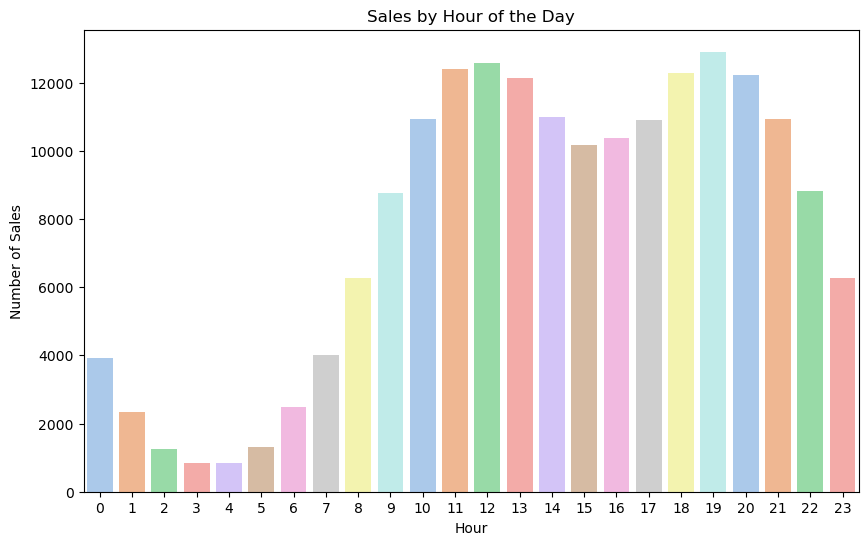

In [10]:
# Analyze sales by hour of the day
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=data, palette='pastel')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Sales')
plt.show()